In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast

In [96]:
# Checking the working directory
import os
print(os.getcwd())

c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025


In [97]:
# Downloading the dataset

import pandas as pd

# Load Pickle version
df = pd.read_pickle(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [ ]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

In [7]:
# Display summary information on the copy of original DataFrame

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           61953 non-null  int64         
 1   index                61953 non-null  int64         
 2   title                61953 non-null  object        
 3   company_name         61953 non-null  object        
 4   location             61916 non-null  object        
 5   via                  61944 non-null  object        
 6   description          61953 non-null  object        
 7   extensions           61953 non-null  object        
 8   job_id               61953 non-null  object        
 9   thumbnail            38194 non-null  object        
 10  posted_at            61763 non-null  object        
 11  schedule_type        61707 non-null  object        
 12  work_from_home       27980 non-null  object        
 13  salary               10088 non-

In [8]:
# Filter Data Frame to include only data for the year 2025

df_2025 = df_copy[df_copy['year'] == 2025].copy()

In [9]:
# Display summary information of filtered 2025 DataFrame

df_2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6583 entries, 461 to 31047
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           6583 non-null   int64         
 1   index                6583 non-null   int64         
 2   title                6583 non-null   object        
 3   company_name         6583 non-null   object        
 4   location             6583 non-null   object        
 5   via                  6583 non-null   object        
 6   description          6583 non-null   object        
 7   extensions           6583 non-null   object        
 8   job_id               6583 non-null   object        
 9   thumbnail            3407 non-null   object        
 10  posted_at            6442 non-null   object        
 11  schedule_type        6569 non-null   object        
 12  work_from_home       1908 non-null   object        
 13  salary               677 non-null  

In [10]:
# Verifying the descriptive statistics for filtered 2025 DataFrame

df_2025.describe()

,Unnamed: 0,index,date_time,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,year,month
count,6583.000000,6583.000000,6583,0.0,677.000000,659.000000,659.000000,201.000000,401.000000,677.000000,6583.0,6583.000000
mean,18128.317029,1289.971745,2025-02-21 19:05:56.612317184,NaN,64233.254505,53402.039970,76053.727011,34.932264,107144.976347,94142.825871,2025.0,2.276925
min,461.000000,0.000000,2025-01-01 04:00:08.023239,NaN,10.000000,8.000000,12.000000,10.000000,36091.000000,20800.000000,2025.0,1.000000
25%,5269.500000,859.000000,2025-01-28 04:00:15.350106112,NaN,52.500000,46.290000,65.000000,19.070000,79202.215000,69562.570000,2025.0,1.000000
50%,27756.000000,1270.000000,2025-02-18 04:00:18.766462976,NaN,68500.000000,60000.000000,78000.000000,32.500000,97407.000000,85000.000000,2025.0,2.000000
75%,29401.500000,1775.500000,2025-03-19 03:00:11.762270976,NaN,105000.000000,84017.000000,120000.000000,47.440000,129780.000000,114990.000000,2025.0,3.000000
max,31047.000000,2620.000000,2025-04-18 03:00:18.316061,NaN,290000.000000,265000.000000,338910.000000,90.000000,290000.000000,290000.000000,2025.0,4.000000
std,12745.798672,613.670297,NaN,NaN,60693.613479,49231.180181,72754.114353,18.359506,41121.503892,41114.547912,0.0,1.042850


In [98]:
# Record keeping for filtered 2025 data from df_copy Data Frame

print(f'Filtered {len(df_2025):,} job postings for year 2025')

Filtered 6,583 job postings for year 2025


In [99]:
# Check DataFrame df_2025's filtered data validation

assert df_2025['year'].nunique() == 1 and df_2025['year'].iloc[0] == 2025

In [100]:
# Log shape changes between df_copy and df_2025 DataFrame

print(f'Original: {df_copy.shape[0]:,} rows -> 2025 subset: {df_2025.shape[0]:,} rows')

Original: 61,953 rows -> 2025 subset: 6,583 rows


In [101]:
# Select and reorder relevant columns for analysis, and reset index for clarity

df_2025 = df_2025[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

df_2025.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[pyspark, power_bi, tableau, azure, javascript..."
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,"[excel, outlook, power_bi, spreadsheet, sql, w..."
2,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Bloom Healthcare,"Littleton, CO",linkedin,Full-Time,False,,Data Analyst,NaN,NaN,NaN,"[sql, python]"
3,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Ehub Global solution,"Denver, CO",indeed,Contract,False,,Data Analyst,106111.2,51.015,NaN,"[mongo, python, shell, pl/sql, sql]"
4,2025-04-18 03:00:13.756407,2025-04-18,2025,4,City of Grand Junction,"Grand Junction, CO",governmentjobs.com,Full-Time,False,,Data Analyst,81494.4,NaN,NaN,[]


# Capturing the Most In-Demand Skills for Data Positions in the U.S. in 2025

In [102]:
# Count job titles in df_2025
# Generate a count of each unique cleaned job title

df_2025['clean_title'].value_counts().reset_index(name='title_total')
df_2025_title_count = df_2025['clean_title'].value_counts().reset_index(name='title_total')
df_2025_title_count.head(5)

,clean_title,title_total
0,Data Analyst,4441
1,Business Analyst,489
2,Data Scientist,203
3,Healthcare Analyst,193
4,Data Engineer,176


In [103]:
# Expand the 'job_skills' list into individual rows
# Allows counting each skill independently across job postings

df_2025_skills = df_2025.explode('job_skills')
df_2025_skills[['clean_title', 'job_skills']]

,clean_title,job_skills
0,Data Analyst,pyspark
0,Data Analyst,power_bi
0,Data Analyst,tableau
0,Data Analyst,azure
0,Data Analyst,javascript
...,...,...
6580,Data Analyst,NaN
6581,Data Analyst,excel
6581,Data Analyst,git
6581,Data Analyst,python


In [104]:
# Count how often each skill appears for each job title

df_2025_skills_count = (
    df_2025_skills
    .groupby(['job_skills', 'clean_title'])
    .size()
    .reset_index(name='skill_count')
)

df_2025_skills_count

,job_skills,clean_title,skill_count
0,airflow,Business Analyst,3
1,airflow,Clinical Data Analyst,2
2,airflow,Data Analyst,36
3,airflow,Data Engineer,12
4,airflow,Data Modeler,1
...,...,...,...
890,word,Product Analyst,1
891,word,Quantitative Analyst,2
892,word,Statistical Analyst,3
893,word,Supply Chain Analyst,12


In [105]:
# Merge with total job title counts to calculate percentages

df_2025_skill_percent = pd.merge(
    df_2025_skills_count, 
    df_2025_title_count, 
    how='left', 
    on='clean_title'
)
df_2025_skill_percent

,job_skills,clean_title,skill_count,title_total
0,airflow,Business Analyst,3,489
1,airflow,Clinical Data Analyst,2,119
2,airflow,Data Analyst,36,4441
3,airflow,Data Engineer,12,176
4,airflow,Data Modeler,1,23
...,...,...,...,...
890,word,Product Analyst,1,75
891,word,Quantitative Analyst,2,31
892,word,Statistical Analyst,3,31
893,word,Supply Chain Analyst,12,30


In [106]:
# Calculate percentage of job listings requiring each skill (per title)

df_2025_skill_percent['skill_percentage'] = round(100* df_2025_skill_percent['skill_count'] / 
                                                  df_2025_skill_percent['title_total'], 2)

df_2025_skill_percent

,job_skills,clean_title,skill_count,title_total,skill_percentage
0,airflow,Business Analyst,3,489,0.61
1,airflow,Clinical Data Analyst,2,119,1.68
2,airflow,Data Analyst,36,4441,0.81
3,airflow,Data Engineer,12,176,6.82
4,airflow,Data Modeler,1,23,4.35
...,...,...,...,...,...
890,word,Product Analyst,1,75,1.33
891,word,Quantitative Analyst,2,31,6.45
892,word,Statistical Analyst,3,31,9.68
893,word,Supply Chain Analyst,12,30,40.00


In [107]:
# Renaming columns for clarity

df_2025_skill_percent.rename(columns={
    'job_skills': 'skill',
    'clean_title': 'job_title'
}, inplace=True)

df_2025_skill_percent

,skill,job_title,skill_count,title_total,skill_percentage
0,airflow,Business Analyst,3,489,0.61
1,airflow,Clinical Data Analyst,2,119,1.68
2,airflow,Data Analyst,36,4441,0.81
3,airflow,Data Engineer,12,176,6.82
4,airflow,Data Modeler,1,23,4.35
...,...,...,...,...,...
890,word,Product Analyst,1,75,1.33
891,word,Quantitative Analyst,2,31,6.45
892,word,Statistical Analyst,3,31,9.68
893,word,Supply Chain Analyst,12,30,40.00


In [108]:
# Sorting skills 

df_2025_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_2025_skills_count

,job_skills,clean_title,skill_count
750,sql,Data Analyst,1824
164,excel,Data Analyst,1205
528,python,Data Analyst,1202
796,tableau,Data Analyst,1120
465,power_bi,Data Analyst,1043
...,...,...,...
414,numpy,Data Engineer,1
858,vba,Statistical Analyst,1
230,gitlab,Cyber Security Analyst,1
233,gitlab,Data Modeler,1


In [109]:
# Capturing Top 5 job titles in 2025

job_titles_2025 = df_2025_skills_count['clean_title'].dropna().unique().tolist()
job_titles_2025 = sorted(job_titles_2025[:5])
job_titles_2025

['Business Analyst',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Healthcare Analyst']

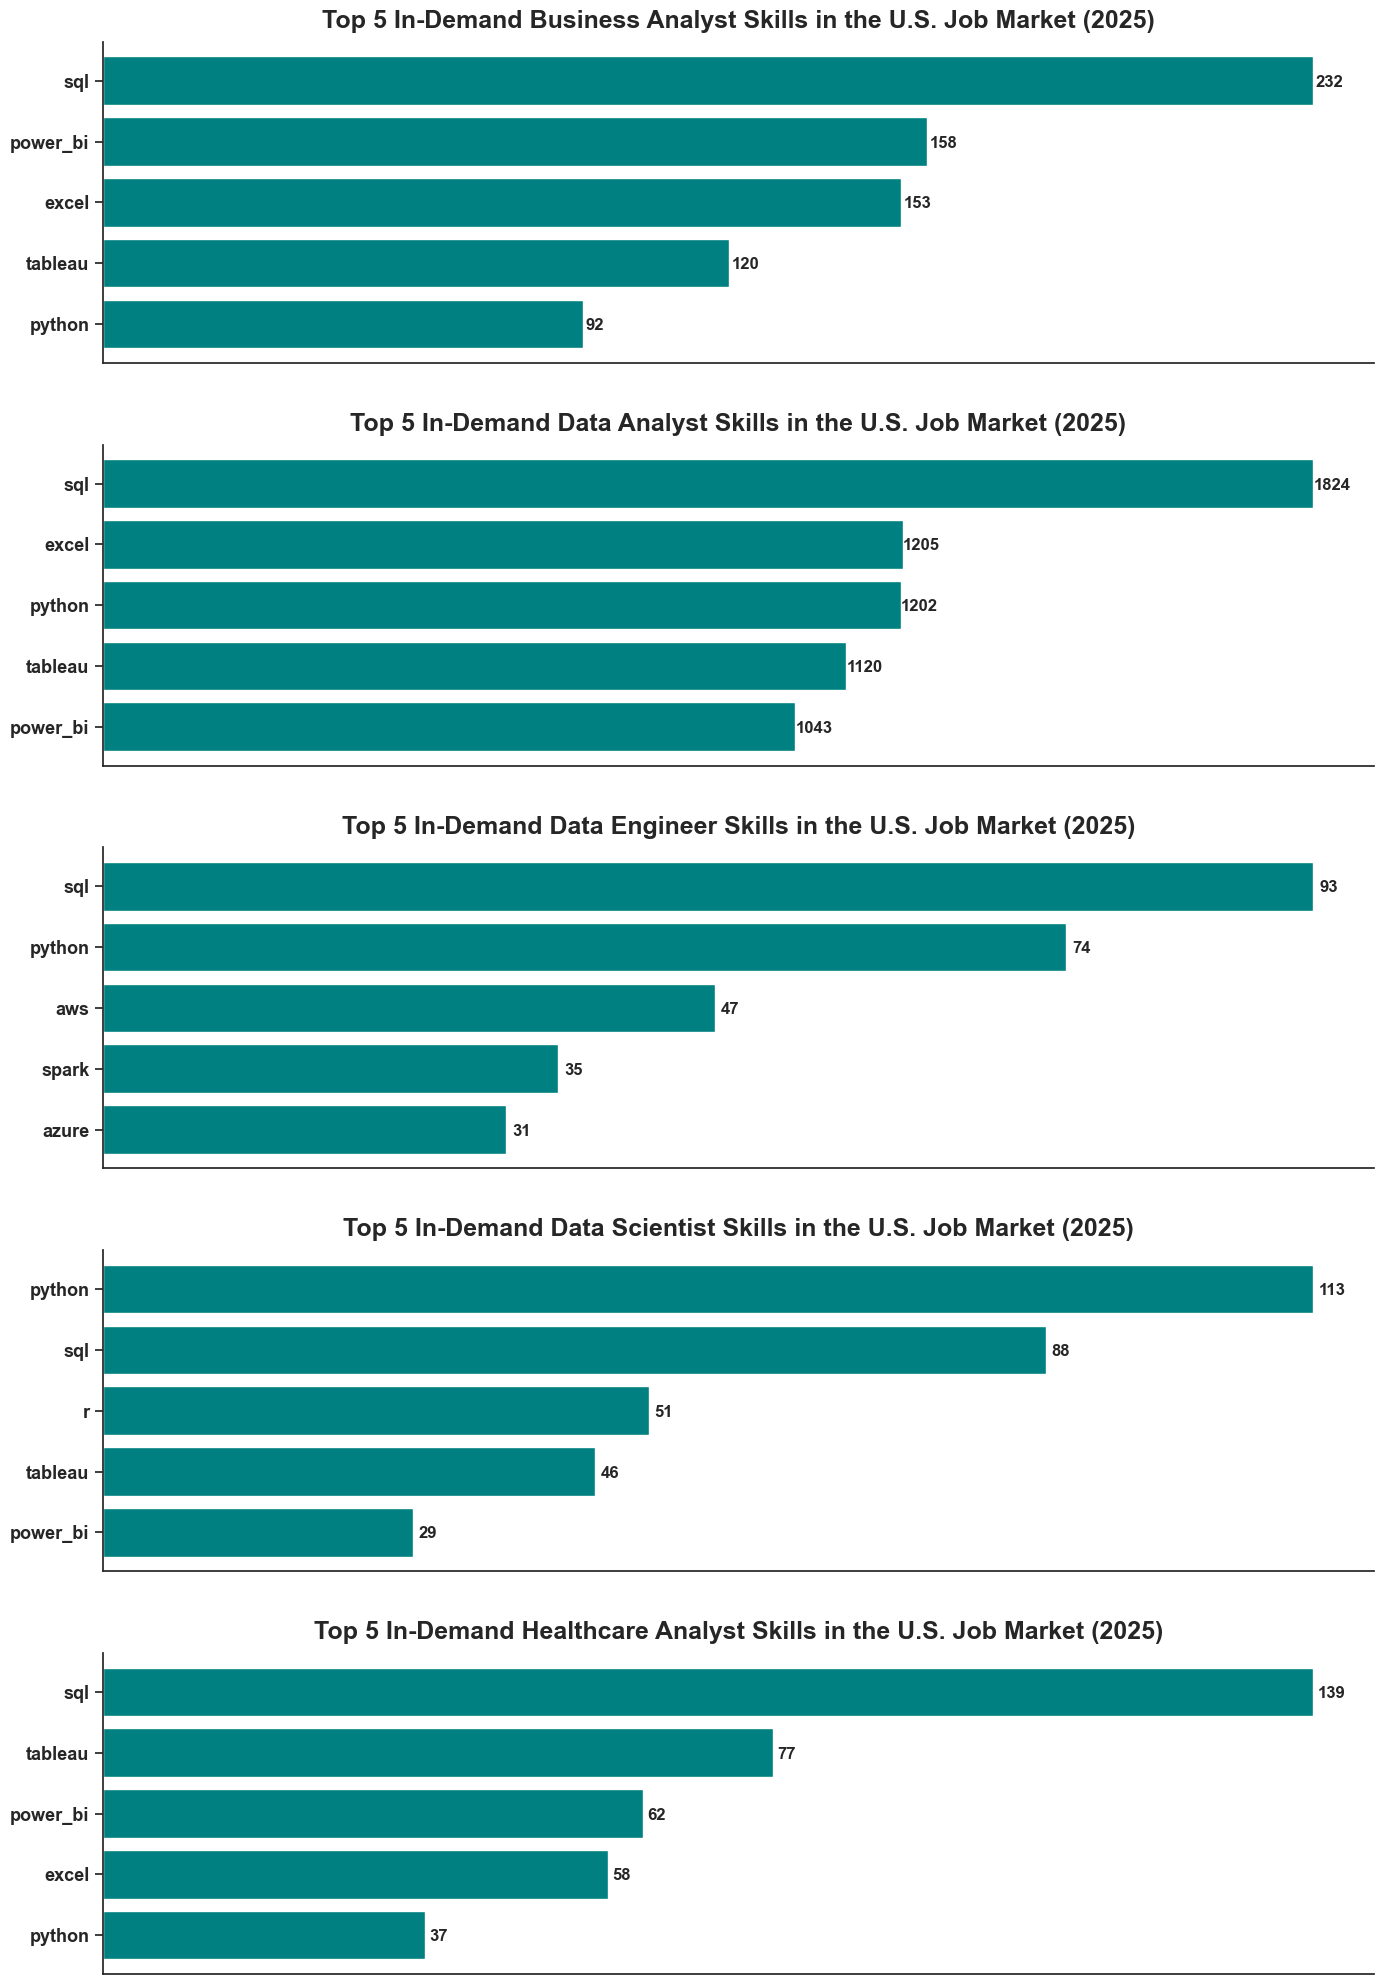

In [ ]:
# Most Sought-After Skills for Leading Data Roles in 2025


# Create subplots
fig, ax = plt.subplots(len(job_titles_2025), 1, figsize=(14, 20), sharex=False)

# Ensure ax is always iterable
if len(job_titles_2025) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles_2025):
    # Filter and sort top 5 skills
    df_2025_plot = df_2025_skills_count[
        df_2025_skills_count['clean_title'] == job_title
    ].nlargest(5, 'skill_count')

    # Plot with ax[i]
    bars = ax[i].barh(
        df_2025_plot['job_skills'],
        df_2025_plot['skill_count'],
        color='teal'
    )

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax[i].text(
            width + 0.5, y, f'{int(width)}',
            va='center_baseline', 
            fontsize=12, 
            fontweight='bold'
        )

    # Despine the right side
    for axes in ax:
        sns.despine(ax=axes, right=True)

    # Customize each subplot (← moved inside the loop)
    ax[i].invert_yaxis()
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_title(
        f'Top 5 In-Demand {job_title} Skills in the U.S. Job Market (2025)',
        fontsize=18, fontweight='bold', pad=10
    )
     # Make skill names bold and larger
    ax[i].tick_params(axis='y', labelsize=13)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('bold')
    

plt.tight_layout(h_pad=4)
plt.show()


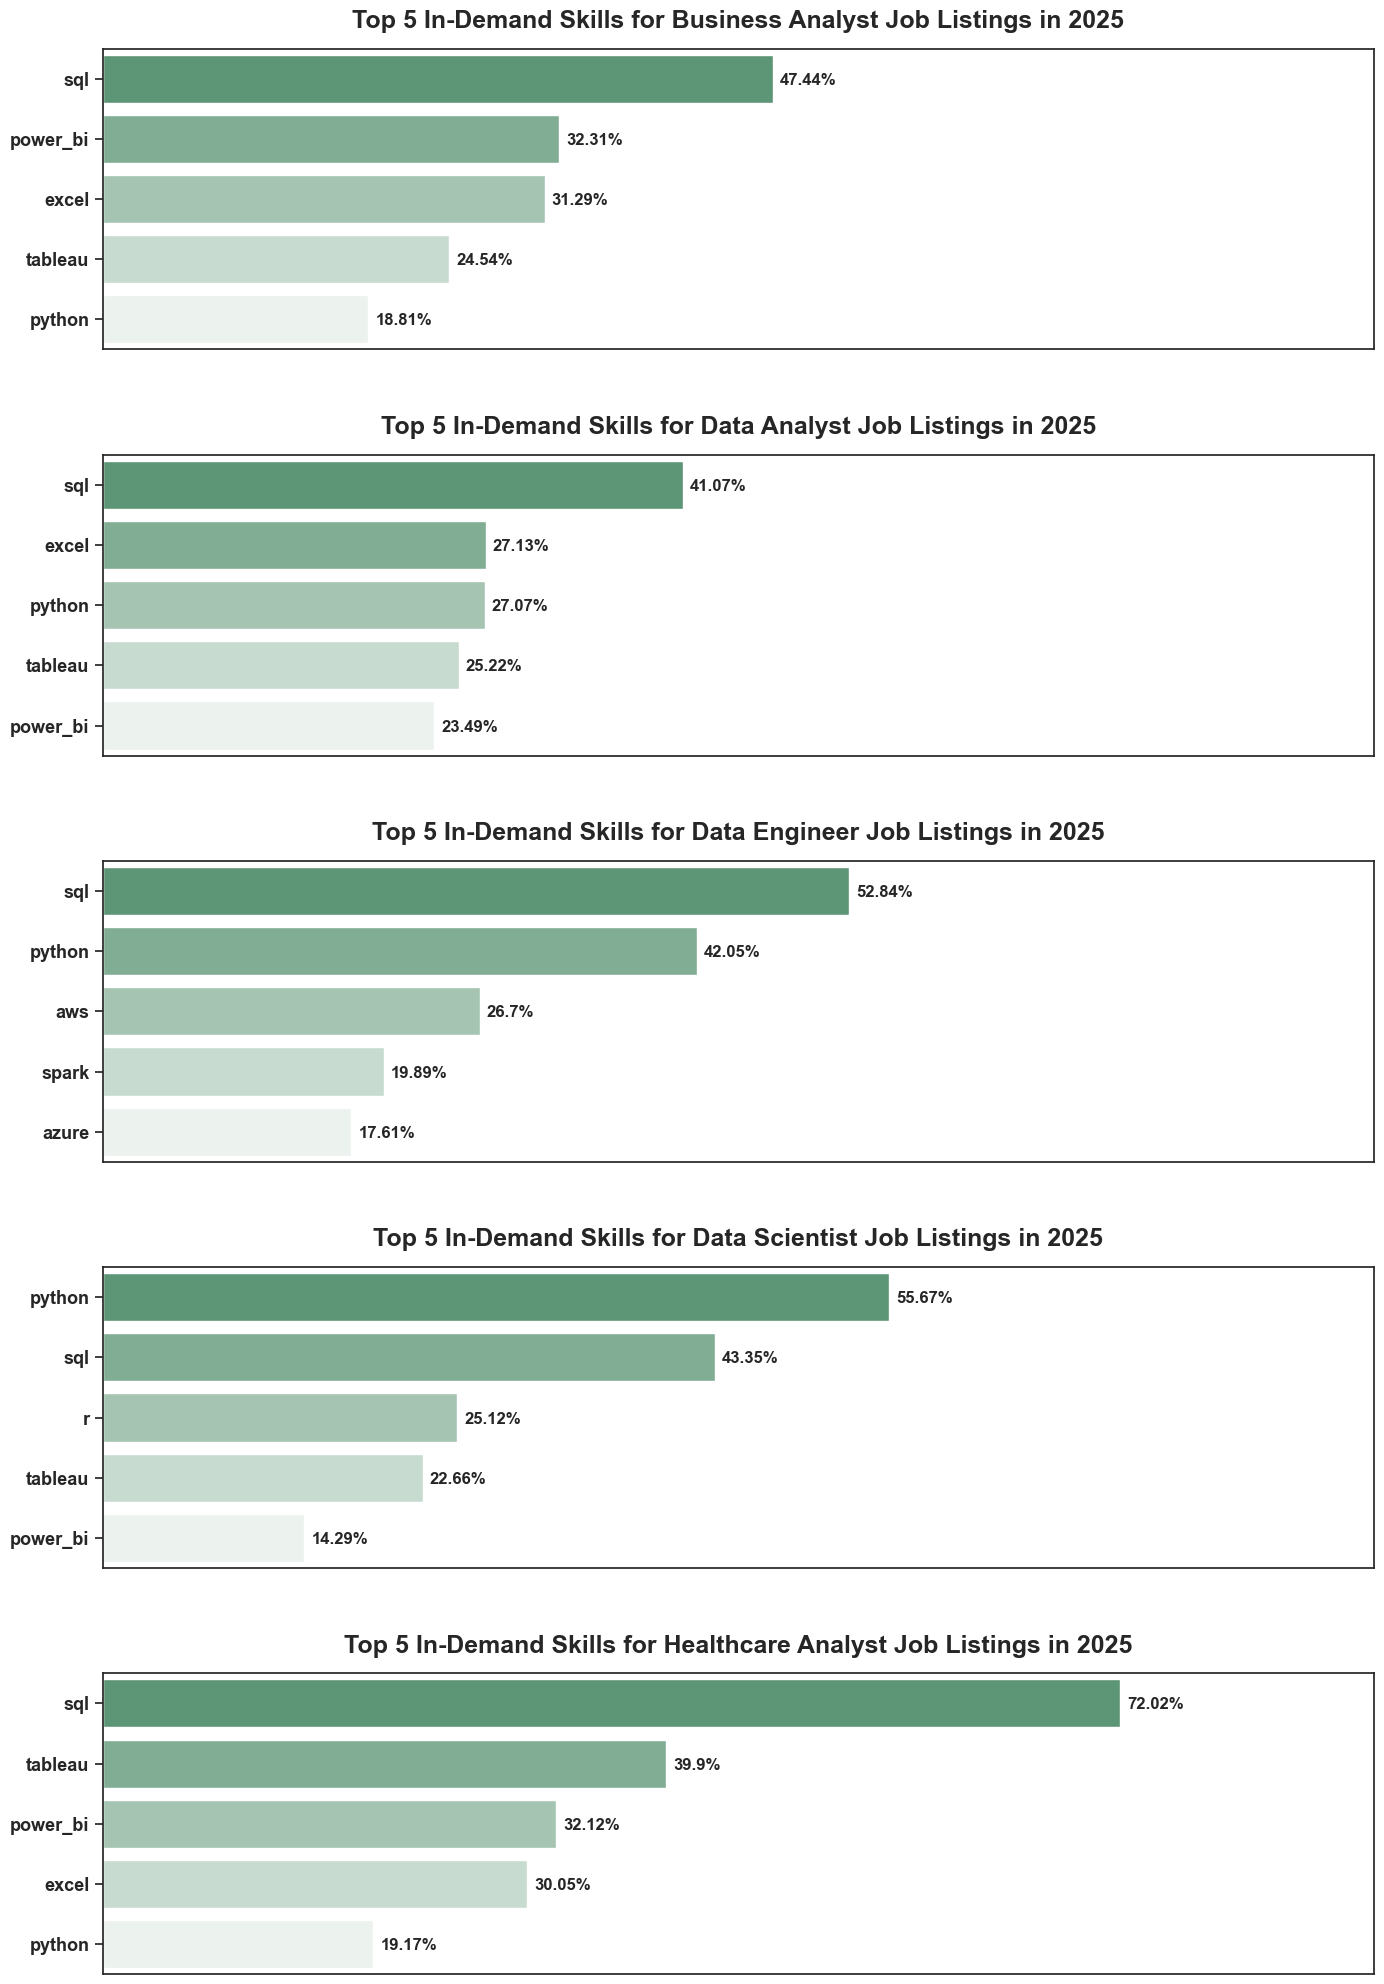

In [111]:
# Key Skills Driving Demand in Data Roles (2025)



# Set the overall theme
sns.set_theme(style='ticks')

# Create subplots
fig, ax = plt.subplots(len(job_titles_2025), 1, figsize=(14, 20), sharex=False)


# Ensuring ax is always iterable
if len(job_titles_2025) == 1:
    ax = [ax]


for i, job_title in enumerate(job_titles_2025):
    # Filter and sort skill counts for the current job title
    df_2025_bar_plot = df_2025_skill_percent[
        df_2025_skill_percent['job_title'] == job_title
    ].nlargest(5, 'skill_count')


    # Add percentage labels to each bar
    for index, value in enumerate (df_2025_bar_plot['skill_percentage']):
        ax[i].text(value + .5, index, f'{value}%', 
                   va='center_baseline', fontsize=12, fontweight='bold')

        

    # Plot horizontal bar chart
    num_lines = df_2025_bar_plot.shape[1]  # number of columns (lines)
    palette = sns.light_palette('seagreen')[:num_lines]

    sns.barplot(
        data=df_2025_bar_plot,
        x='skill_percentage',
        y='skill',
        ax= ax[i],
        hue='skill_count',
        palette=palette

    )
    
    # Title and axis formatting
    ax[i].invert_xaxis()
    ax[i].set_xticks([])
    ax[i].set_title(f'Top 5 In-Demand Skills for {job_title} Job Listings in 2025', 
                    fontsize=18, fontweight='bold', pad=15)
    ax[i].set_xlim(0, 90)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')

     # Make skill names bold and larger
    ax[i].tick_params(axis='y', labelsize=13)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('semibold')


# Final layout tweaks   
plt.tight_layout(h_pad=4)  # Adding vertical padding between plots
plt.show()

In [112]:
# Explode 'job_skills' list into individual rows
# This allows each skill in a posting to be analyzed separately

df_2025_explode = df_2025.explode('job_skills')
df_2025_explode.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,pyspark
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,power_bi
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,tableau
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,azure
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,javascript


In [113]:
# Create pivot table of monthly skill counts
# Rows = month, Columns = individual skills, Values = count of mentions

df_2025_pivot = df_2025_explode.pivot_table(
    index='month',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_2025_pivot

job_skills,airflow,alteryx,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,...,ubuntu,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
month,,,,,,,,,,,,,,,,,,,,,
1,19,35,3,7,4,3,87,72,6,27,...,0,2,3,1,22,13,14,0,0,89
2,19,43,2,0,2,6,75,101,6,22,...,0,4,3,1,25,13,26,0,0,145
3,14,66,2,2,1,13,79,79,9,27,...,1,5,2,0,27,28,9,0,1,141
4,10,24,1,1,1,9,40,52,5,3,...,0,2,0,0,19,7,9,1,0,76


In [114]:
# Add a row labeled 'Total', to calculate total count

df_2025_pivot.loc['Total']  = df_2025_pivot.sum()
df_2025_pivot

job_skills,airflow,alteryx,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,...,ubuntu,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
month,,,,,,,,,,,,,,,,,,,,,
1,19,35,3,7,4,3,87,72,6,27,...,0,2,3,1,22,13,14,0,0,89
2,19,43,2,0,2,6,75,101,6,22,...,0,4,3,1,25,13,26,0,0,145
3,14,66,2,2,1,13,79,79,9,27,...,1,5,2,0,27,28,9,0,1,141
4,10,24,1,1,1,9,40,52,5,3,...,0,2,0,0,19,7,9,1,0,76
Total,62,168,8,10,8,31,281,304,26,79,...,1,13,8,2,93,61,58,1,1,451


In [115]:
# Sort column['job_skill'] by total across all months

df_2025_pivot[df_2025_pivot.loc['Total'].sort_values(ascending=False).index]

df_2025_pivot = df_2025_pivot[df_2025_pivot
                              .loc['Total']
                              .sort_values(ascending=False).index]
df_2025_pivot

job_skills,sql,excel,python,tableau,power_bi,r,sas,word,powerpoint,snowflake,...,dart,golang,lua,js,nltk,rshiny,rust,ubuntu,vue,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,788,531,509,456,440,270,131,89,99,96,...,0,1,0,0,0,0,0,0,0,0
2,767,496,481,437,424,290,137,145,105,88,...,1,0,0,0,0,1,1,0,0,0
3,660,448,453,406,348,265,134,141,107,80,...,1,0,1,1,1,0,0,1,0,1
4,492,305,278,272,252,148,79,76,60,54,...,0,0,0,0,0,0,0,0,1,0
Total,2707,1780,1721,1571,1464,973,481,451,371,318,...,2,1,1,1,1,1,1,1,1,1


In [116]:
#  Drop 'Total' row after sorting

df_2025_pivot = df_2025_pivot.drop('Total')
df_2025_pivot

job_skills,sql,excel,python,tableau,power_bi,r,sas,word,powerpoint,snowflake,...,dart,golang,lua,js,nltk,rshiny,rust,ubuntu,vue,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,788,531,509,456,440,270,131,89,99,96,...,0,1,0,0,0,0,0,0,0,0
2,767,496,481,437,424,290,137,145,105,88,...,1,0,0,0,0,1,1,0,0,0
3,660,448,453,406,348,265,134,141,107,80,...,1,0,1,1,1,0,0,1,0,1
4,492,305,278,272,252,148,79,76,60,54,...,0,0,0,0,0,0,0,0,1,0


In [117]:
# Count total job listings per month

data_2025_total = df_2025.groupby('month').size()
data_2025_total

month
1    1914
2    1938
3    1725
4    1006
dtype: int64

In [118]:
# Calculate percentage of the job listings mentioning eack skill per month
# Normalize skill frequency by overall job listing volume

df_2025_percent = round(df_2025_pivot.div(other=data_2025_total/100, axis=0), 2)
df_2025_percent

job_skills,sql,excel,python,tableau,power_bi,r,sas,word,powerpoint,snowflake,...,dart,golang,lua,js,nltk,rshiny,rust,ubuntu,vue,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,41.17,27.74,26.59,23.82,22.99,14.11,6.84,4.65,5.17,5.02,...,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2,39.58,25.59,24.82,22.55,21.88,14.96,7.07,7.48,5.42,4.54,...,0.05,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.0,0.00
3,38.26,25.97,26.26,23.54,20.17,15.36,7.77,8.17,6.20,4.64,...,0.06,0.00,0.06,0.06,0.06,0.00,0.00,0.06,0.0,0.06
4,48.91,30.32,27.63,27.04,25.05,14.71,7.85,7.55,5.96,5.37,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.1,0.00


In [119]:
# Resetting the df_2023_percent index

df_2025_percent = df_2025_percent.reset_index()

In [120]:
#Convert numeric month index to month names

df_2025_percent['month_name'] = df_2025_percent['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

In [121]:
# Set 'month_name' as index 

df_2025_percent = df_2025_percent.set_index('month_name')

# Drop original numeric month column

df_2025_percent = df_2025_percent.drop(columns='month')

In [122]:
# Verifying the month data has been changed

df_2025_percent

job_skills,sql,excel,python,tableau,power_bi,r,sas,word,powerpoint,snowflake,...,dart,golang,lua,js,nltk,rshiny,rust,ubuntu,vue,vue.js
month_name,,,,,,,,,,,,,,,,,,,,,
Jan,41.17,27.74,26.59,23.82,22.99,14.11,6.84,4.65,5.17,5.02,...,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
Feb,39.58,25.59,24.82,22.55,21.88,14.96,7.07,7.48,5.42,4.54,...,0.05,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0.0,0.00
Mar,38.26,25.97,26.26,23.54,20.17,15.36,7.77,8.17,6.20,4.64,...,0.06,0.00,0.06,0.06,0.06,0.00,0.00,0.06,0.0,0.06
Apr,48.91,30.32,27.63,27.04,25.05,14.71,7.85,7.55,5.96,5.37,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.1,0.00


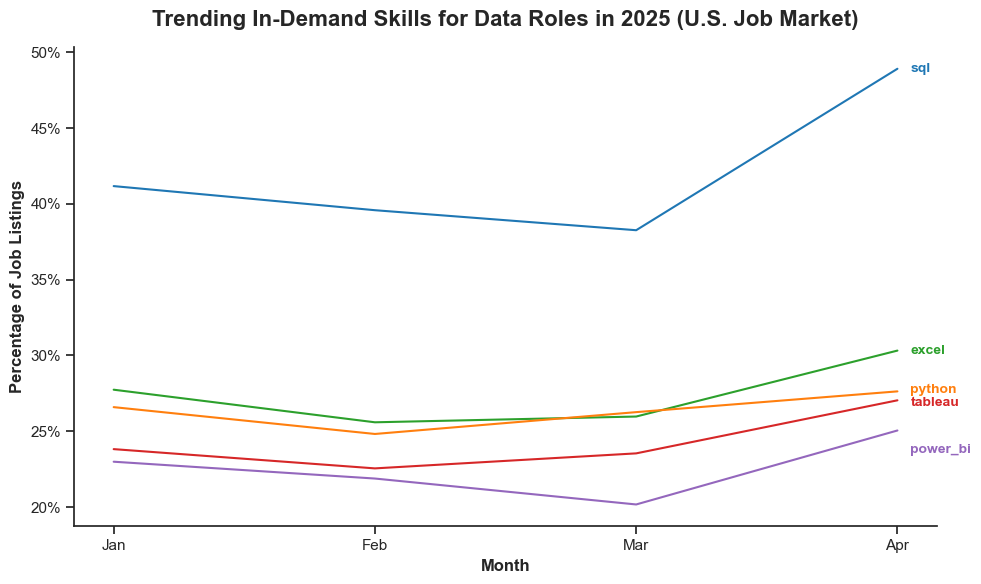

In [132]:
# In-Demand Skills Trends for Data Roles in 2025

# Import libraries
from matplotlib.ticker import PercentFormatter


# Prepare data (top 5 columns for plotting)
df_2025_line_plot = df_2025_percent.iloc[:, :5]

# Define custom color palette (colorblind-friendly)
palette = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']

# Set theme and removing extra chart border
sns.set_theme(style='ticks')


# Create line plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_2025_line_plot, dashes=False, palette=palette)

# Despine AFTER plotting
sns.despine(ax=ax, right=True, top=True)

# Title 
plt.title('Trending In-Demand Skills for Data Roles in 2025 (U.S. Job Market)', 
          fontsize=16, fontweight='bold', pad=15)

# Adjust label offsets to avoid overlap
offsets = [0, 0, 0.1, -0.2, -1.3]  # Adjust Y positions for each skill

# Axis labels
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of Job Listings', fontsize=12, fontweight='bold')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()

# Annotating end of each line with the skill name

for i, column in enumerate(df_2025_line_plot.columns):
    y = df_2025_line_plot.iloc[- 1, i] + offsets[i]
    plt.text(len(df_2025_line_plot) - 1 + 0.05, y, column,
             va='center', fontsize=10, fontweight='bold', color=palette[i])
    

# Layout adjustment

plt.tight_layout()
plt.show()

# 2025 U.S. Job Listings Salary Analysis

In [55]:
# Extract top 5 job titles for 2025

df_2025['clean_title'].value_counts().index[:5].to_list()

['Data Analyst',
 'Business Analyst',
 'Data Scientist',
 'Healthcare Analyst',
 'Data Engineer']

In [56]:
# Place top 5 data titles in list named  data_positions_2025

data_positions_2025 = df_2025['clean_title'].value_counts().index[:5].to_list()
data_positions_2025

['Data Analyst',
 'Business Analyst',
 'Data Scientist',
 'Healthcare Analyst',
 'Data Engineer']

In [86]:
# Filter DataFrame for rows where data title is in the top data_positions_2025 list

df_2025_top_positions = df_2025[df_2025['clean_title'].isin(data_positions_2025)]
df_2025_top_positions.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[pyspark, power_bi, tableau, azure, javascript..."
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,"[excel, outlook, power_bi, spreadsheet, sql, w..."
2,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Bloom Healthcare,"Littleton, CO",linkedin,Full-Time,False,,Data Analyst,NaN,NaN,NaN,"[sql, python]"
3,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Ehub Global solution,"Denver, CO",indeed,Contract,False,,Data Analyst,106111.2,51.015,NaN,"[mongo, python, shell, pl/sql, sql]"
4,2025-04-18 03:00:13.756407,2025-04-18,2025,4,City of Grand Junction,"Grand Junction, CO",governmentjobs.com,Full-Time,False,,Data Analyst,81494.4,NaN,NaN,[]


In [ ]:
# Group the DataFrame by clean title, calculate median salary yearly for each,
# Sorts the titles by median salary in descending order, and returns the sorted clean titles.

position_order_2025 = df_2025_top_positions.groupby('clean_title')['salary_yearly'].median().sort_values(ascending=False).index
position_order_2025

Index(['Data Scientist', 'Data Engineer', 'Business Analyst', 'Data Analyst',
       'Healthcare Analyst'],
      dtype='object', name='clean_title')

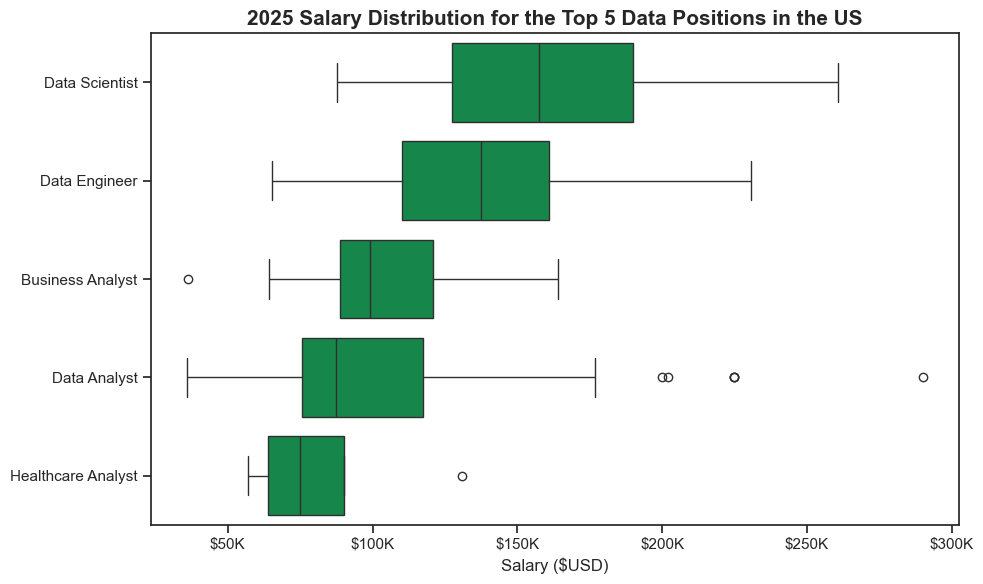

In [87]:
# Analyzing Salary Distribution of Popular Data Roles (2025)


# Create a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2025_top_positions, 
            x='salary_yearly', 
            y='clean_title',
            order=position_order_2025, color='#039949')

sns.set_theme(style='ticks')

plt.title('2025 Salary Distribution for the Top 5 Data Positions in the US', fontsize = 15, fontweight='bold')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.tight_layout()
plt.show()

# Investigating 2025 U.S. Median Salary vs Skill for Analyst Job Listings

In [63]:
# Filtering Data Frame to hold only 2025 Analyst job listings

df_2025_analyst =df_2025[
   df_2025['clean_title'].str.contains('analyst', case=False, na=False)
].copy()

df_2025_analyst.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2025-04-18 03:00:13.756407,2025-04-18,2025,4,EY,"Denver, CO",ey careers,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,"[pyspark, power_bi, tableau, azure, javascript..."
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,"[excel, outlook, power_bi, spreadsheet, sql, w..."
2,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Bloom Healthcare,"Littleton, CO",linkedin,Full-Time,False,,Data Analyst,NaN,NaN,NaN,"[sql, python]"
3,2025-04-18 03:00:13.756407,2025-04-18,2025,4,Ehub Global solution,"Denver, CO",indeed,Contract,False,,Data Analyst,106111.2,51.015,NaN,"[mongo, python, shell, pl/sql, sql]"
4,2025-04-18 03:00:13.756407,2025-04-18,2025,4,City of Grand Junction,"Grand Junction, CO",governmentjobs.com,Full-Time,False,,Data Analyst,81494.4,NaN,NaN,[]


In [ ]:
# Drop all NaN salary_yearly values

df_2025_analyst = df_2025_analyst.dropna(subset=['salary_yearly'])
df_2025_analyst.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,355,355.0,355.000000,355.000000,0.0,355.000000
mean,2025-02-26 17:59:42.840376320,2025.0,2.430986,101839.345676,NaN,101839.345676
min,2025-01-01 04:00:08.023239,2025.0,1.000000,36091.000000,NaN,36091.000000
25%,2025-02-01 04:00:10.142825984,2025.0,2.000000,77025.000000,NaN,77025.000000
50%,2025-02-27 04:00:23.046351872,2025.0,2.000000,92250.000000,NaN,92250.000000
75%,2025-03-23 15:00:12.901050880,2025.0,3.000000,120000.000000,NaN,120000.000000
max,2025-04-18 03:00:13.756407,2025.0,4.000000,290000.000000,NaN,290000.000000
std,NaN,0.0,1.074958,37108.055736,NaN,37108.055736


In [66]:
# Expand the 'job_skills' list into separate rows for each skill

df_2025_analyst = df_2025_analyst.explode('job_skills')


# Preview salary and skill data after exploding for further analysis

df_2025_analyst[['salary_yearly', 'job_skills']].head(5)

,salary_yearly,job_skills
1,52000.0,excel
1,52000.0,outlook
1,52000.0,power_bi
1,52000.0,spreadsheet
1,52000.0,sql


In [67]:
# Extract Top Salary for Analyst position across all job skills

df_2025_analyst.groupby('job_skills')['salary_yearly'].agg(['count', 'median']).sort_values(by='median', ascending=False)

,count,median
job_skills,,
pyspark,3,225000.00
c/c++,1,163000.00
splunk,4,158000.00
gcp,6,145750.00
ruby,1,144000.00
...,...,...
groovy,2,80000.00
cognos,2,77300.00
vba,8,68114.28


In [68]:
# Extract Top Salary for Analyst position across all job skills.
# Place extracted data into new Data Frame

df_2025_top_analyst_salary = (df_2025_analyst
                      .groupby('job_skills')['salary_yearly']
                      .agg(['count', 'median'])
                      .sort_values(by='median', ascending=False)
                    )
df_2025_top_analyst_salary.head(5)

,count,median
job_skills,,
pyspark,3,225000.0
c/c++,1,163000.0
splunk,4,158000.0
gcp,6,145750.0
ruby,1,144000.0


In [69]:
# Extract top 10 salaries for Analyst positions in 2025

df_2025_top_analyst_salary = df_2025_top_analyst_salary.head(10)
df_2025_top_analyst_salary

,count,median
job_skills,,
pyspark,3,225000.0
c/c++,1,163000.0
splunk,4,158000.0
gcp,6,145750.0
ruby,1,144000.0
ssis,1,137500.0
powershell,1,137500.0
ssrs,3,137500.0
visual_basic,3,134887.5


In [70]:
# Explode skills for the analyst-filtered DataFrame

df_2025_analyst_exploded = df_2025_analyst.explode('job_skills')
df_2025_analyst_exploded.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,excel
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,outlook
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,power_bi
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,spreadsheet
1,2025-04-18 03:00:13.756407,2025-04-18,2025,4,GEHA,Anywhere,indeed,Full-Time,True,Intern,Data Analyst,52000.0,NaN,52000.0,sql


In [71]:
# Place extracted data into a new DataFrame from the correct exploded DataFrame

df_2025_analyst_skill = (
    df_2025_analyst_exploded
    .groupby('job_skills')['salary_yearly']
    .agg(['count', 'median'])
    .sort_values(by='count', ascending=False)
)

df_2025_analyst_skill

,count,median
job_skills,,
sql,248,92500.0
tableau,165,87050.0
power_bi,152,88500.0
excel,141,87050.0
python,116,107089.0
...,...,...
c/c++,1,163000.0
fortran,1,86000.0
powershell,1,137500.0


In [72]:
# Select top 10 analyst skills 

df_2025_analyst_skill = (df_2025_analyst_skill.head(10)
                         .sort_values(by='median', ascending=False)
                        )
df_2025_analyst_skill

,count,median
job_skills,,
python,116,107089.0
powerpoint,31,105000.0
sql,248,92500.0
power_bi,152,88500.0
tableau,165,87050.0
excel,141,87050.0
word,55,87050.0
r,98,84833.4
sas,48,60000.0


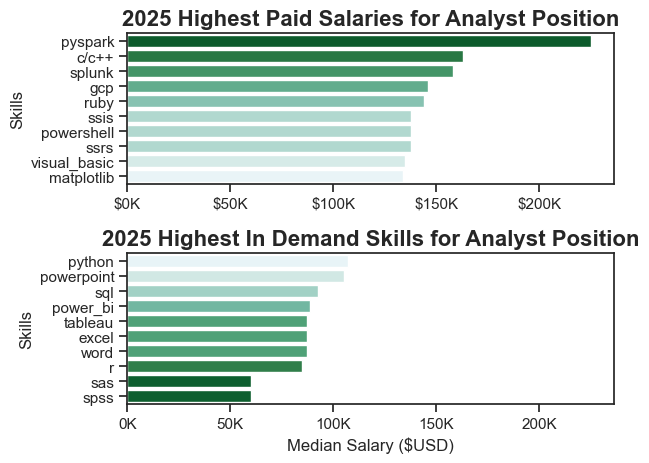

In [143]:
# The Most Lucrative Skills for Analyst Roles (2024)


# Setting figure for visuals
fig, ax = plt.subplots(2, 1)


# Setting visual theme style and colour palette
sns.set_theme(style='ticks')
palette = sns.color_palette('BuGn', n_colors=8)

# Top 10 Highest Paid Salaries for Analyst Positions
sns.barplot(data=df_2025_top_analyst_salary, x='median', 
            y=df_2025_top_analyst_salary.index, ax = ax[0], 
            hue='median', palette=palette, legend=False
            )


ax[0].set_title('2025 Highest Paid Salaries for Analyst Position', fontsize=16, fontweight='bold')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))
ax[0].set_ylabel('Skills')


# Top 10 Most In Demand Skills for Analyst Positions
palette = sns.color_palette('BuGn_r', n_colors=7)
sns.barplot(data=df_2025_analyst_skill, x='median', 
            y=df_2025_analyst_skill.index, ax = ax[1],
            hue='median', palette=palette, legend=False
            )


ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('2025 Highest In Demand Skills for Analyst Position', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{int(x/1000)}K'))
ax[1].set_ylabel('Skills')

fig.tight_layout()
plt.show()

In [74]:
# Place extracted data into new Data Frame

df_2025_skill_explode = df_2025_analyst.explode('job_skills')

# Verifying top 10 salaries and their corresponding job skills

df_2025_skill_explode[['salary_yearly', 'job_skills']].head(10)

,salary_yearly,job_skills
1,52000.0,excel
1,52000.0,outlook
1,52000.0,power_bi
1,52000.0,spreadsheet
1,52000.0,sql
1,52000.0,word
6,153000.0,tableau
6,153000.0,excel
6,153000.0,sql
9,60100.0,sql


In [75]:
# Place extracted data into a new Data Frame

df_2025_analyst_skills = (df_2025_skill_explode
                          .groupby('job_skills')['salary_yearly']
                          .agg(['count', 'median'])
                          .sort_values(by='count',ascending=False )
                         )

df_2025_analyst_skills

,count,median
job_skills,,
sql,248,92500.0
tableau,165,87050.0
power_bi,152,88500.0
excel,141,87050.0
python,116,107089.0
...,...,...
c/c++,1,163000.0
fortran,1,86000.0
powershell,1,137500.0


In [76]:
# Renaming the columns in new Data Frame for clarity

df_2025_analyst_skills = (df_2025_analyst_skills
                          .rename(columns=
                                  {'count' : 'skill_count', 
                                   'median': 'median_salary'})
                        )

df_2025_analyst_skills

,skill_count,median_salary
job_skills,,
sql,248,92500.0
tableau,165,87050.0
power_bi,152,88500.0
excel,141,87050.0
python,116,107089.0
...,...,...
c/c++,1,163000.0
fortran,1,86000.0
powershell,1,137500.0


In [77]:
# Calculating the number of job listings for 2025, by taking the length of the data frame df_2025
# Place results in a variable named df_2025_job_count

df_2025_analyst_job_count = len(df_2025_analyst)
df_2025_analyst_job_count

1590

In [78]:
# Creating a new column for df_2025_analyst_skills named ['skill_percent']
# ['skill_percent'] will hold the percentage calculation below

df_2025_analyst_skills['skill_percent'] = (df_2025_analyst_skills['skill_count'] 
                                           / df_2025_analyst_job_count * 100
                                        )
df_2025_analyst_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,248,92500.0,15.597484
tableau,165,87050.0,10.377358
power_bi,152,88500.0,9.559748
excel,141,87050.0,8.867925
python,116,107089.0,7.295597
...,...,...,...
c/c++,1,163000.0,0.062893
fortran,1,86000.0,0.062893
powershell,1,137500.0,0.062893


In [83]:
# Define a minimum percentage threshold to filter out less common skills
# This helps to reduce visual clutter in graphs by focusing only on more prevalent skills

min_2025_skill_threshold = 6  # Only include skills that appear in more than 2% of job skills

# Filter the analyst skills DataFrame based on the threshold and create a new DataFrame

df_2025_analyst_skills_filtered = (df_2025_analyst_skills
                                   [df_2025_analyst_skills['skill_percent'] 
                                    > min_2025_skill_threshold]
                                )

df_2025_analyst_skills_filtered

,skill_count,median_salary,skill_percent
job_skills,,,
sql,248,92500.0,15.597484
tableau,165,87050.0,10.377358
power_bi,152,88500.0,9.559748
excel,141,87050.0,8.867925
python,116,107089.0,7.295597
r,98,84833.4,6.163522


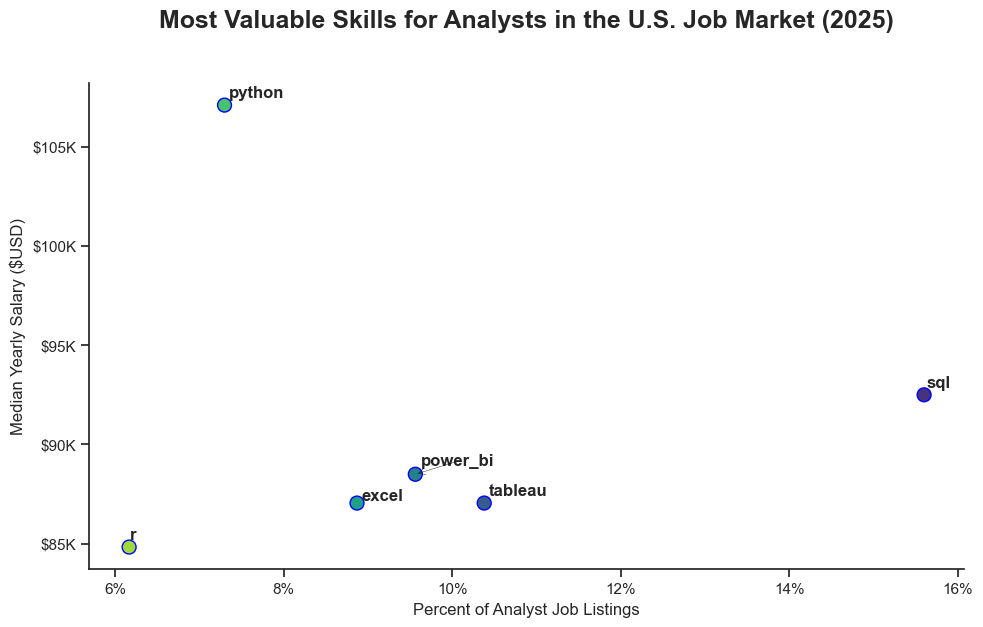

In [ ]:
# Top Analyst Skills in the U.S. (2025)


# Import libraries
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text


# Set theme and colour palette
sns.set_theme(style='ticks')
palette = sns.color_palette('viridis', len(df_2025_analyst_skills_filtered))  

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Colour each point uniquely based on skill
scatter = ax.scatter(
    x=df_2025_analyst_skills_filtered['skill_percent'],
    y=df_2025_analyst_skills_filtered['median_salary'],
    c=palette,
    s=100,  # Increase scatter dot size for better visibility
    edgecolor='blue' 
)

# Add text labels
text = []
for i, txt in enumerate(df_2025_analyst_skills_filtered.index):
    text.append(ax.text(
        df_2025_analyst_skills_filtered['skill_percent'].iloc[i],
        df_2025_analyst_skills_filtered['median_salary'].iloc[i],
        txt,
        fontsize=12, 
        va ='bottom', 
        fontweight= 'bold'
    ))

adjust_text(text, arrowprops=dict(arrowstyle='->', color='black', lw=.3), fontweight='bold')

# Format x-axis and y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))

# Remove all spines 
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Set labels and title
ax.set_xlabel('Percent of Analyst Job Listings', fontsize=12)
ax.set_ylabel('Median Yearly Salary ($USD)', fontsize=12)
ax.set_title('Most Valuable Skills for Analysts in the U.S. Job Market (2025)', fontsize=18, fontweight='bold', pad=40)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()